In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from math import sqrt
from matplotlib import pyplot as plt
from itertools import chain
get_ipython().run_line_magic('matplotlib', 'inline')

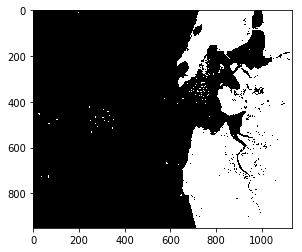

In [2]:
sar = cv2.imread("../dataset/Mumbai_input.png", 0)
cv2.imwrite('intermediate images/Mumbai_gray.png',sar)
image = cv2.imread('intermediate images/Mumbai_gray.png')
ret,img = cv2.threshold(image,70,255,0)
plt.imshow(img, cmap='Greys')

In [3]:
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,15)
cv2.imwrite("intermediate images/denoised.png",img)



True

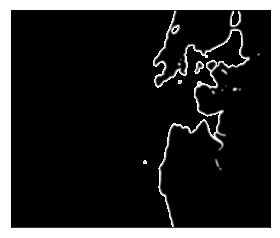

In [4]:
gblur = cv2.GaussianBlur(img,(17,17),0)
cv2.imwrite("intermediate images/gblur1.png",gblur)
blur = cv2.medianBlur(gblur,9)
cv2.imwrite("intermediate images/mblur_gblur1.png",blur)
ret_,img_ = cv2.threshold(blur,90,255,0)
cv2.imwrite("intermediate images/thres_mblur_gblur1.png",img_)
# plt.imshow(img_, cmap='Greys')
gblur = cv2.GaussianBlur(img_,(17,17),0)
cv2.imwrite("intermediate images/gblur2_thres_mblur_gblur1.png",gblur)
final = img_ - gblur
plt.imshow(final)
plt.xticks([]), plt.yticks([])
plt.show()

True

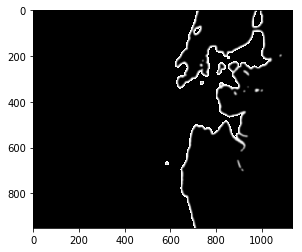

In [5]:
plt.imshow(final,cmap = 'gray')
cv2.imwrite("intermediate images/Mumbai_contour.png",final)

(952, 1134, 3)


True

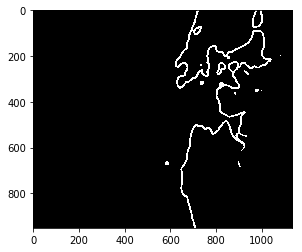

In [6]:
(thresh, final) = cv2.threshold(final,120,255,cv2.THRESH_BINARY)
print(final.shape)
plt.imshow(final, cmap='gray')
cv2.imwrite("intermediate images/Mumbai_contour_binary.png",final)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

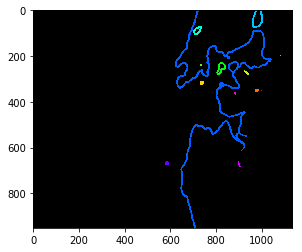

In [7]:
final = cv2.imread("intermediate images/Mumbai_contour_binary.png",0)
ret, labels = cv2.connectedComponents(final)
connectivity = 8
output = cv2.connectedComponents(final,connectivity,cv2.CV_32S)
output[0]
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled = cv2.merge([label_hue, blank_ch, blank_ch])

print(label_hue)
# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

plt.imshow(labeled_img)
cv2.imwrite("intermediate images/Mumbai_labeled_img.png",labeled_img)

In [8]:
im2, contours, hierarchy = cv2.findContours(final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
cnt

array([[[912, 696]],

       [[911, 697]],

       [[912, 698]],

       [[912, 699]],

       [[913, 699]],

       [[914, 700]],

       [[915, 699]],

       [[915, 698]],

       [[914, 697]],

       [[913, 697]]], dtype=int32)

In [9]:
perimeter=[]
for i in range(len(contours)): 
    perimeter.append (cv2.arcLength(contours[i],True))
    
print(len(perimeter))
print(perimeter)

print(len(perimeter))
print(perimeter)

18
[12.485281229019165, 59.455843687057495, 71.11269783973694, 38.38477575778961, 3.414213538169861, 12.242640614509583, 45.79898953437805, 65.4558436870575, 64.42640602588654, 30.727921724319458, 160.3675308227539, 107.74011421203613, 15.071067690849304, 123.63960886001587, 72.42640590667725, 383.2792181968689, 6009.7235407829285, 109.88225054740906]
18
[12.485281229019165, 59.455843687057495, 71.11269783973694, 38.38477575778961, 3.414213538169861, 12.242640614509583, 45.79898953437805, 65.4558436870575, 64.42640602588654, 30.727921724319458, 160.3675308227539, 107.74011421203613, 15.071067690849304, 123.63960886001587, 72.42640590667725, 383.2792181968689, 6009.7235407829285, 109.88225054740906]


In [10]:
perimeter=[]
for i in range(len(contours)): 
    perimeter.append (cv2.arcLength(contours[i],True))

perimeter
len(perimeter)

18

In [11]:
perimetern=[]
contourn=[]
for j in range(len(perimeter)):
        if perimeter[j]>=100:
            perimetern.append(perimeter[j])
            contourn.append(contours[j])
            

perimetern
len(contourn)

6

True

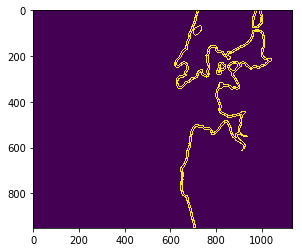

In [12]:
drawing = np.zeros([952,1134],np.uint8)
for cnt in contourn:
    cv2.drawContours(drawing,[cnt],-1,(255,0,0),3)
plt.imshow(drawing)
cv2.imwrite("intermediate images/contours_after_perimeter_thresholding.png",drawing)

6
3.605551275463989
3.605551275463989


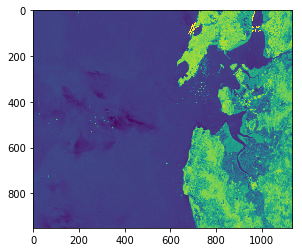

In [13]:
import numpy
from heapq import nsmallest
print(len(contourn))
#dist=[]
distance = []

indx= []
indy=[]
indxn=[]
indyn=[]
r1=[]
r2=[]

def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(row1):
        for j in range(row2):
#            dist.append(np.linalg.norm(cnt1[i]-cnt2[j]))
            distance.append(np.linalg.norm(cnt1[i]-cnt2[j]))
            indx.append(i)
            indy.append(j)
    argsortdistance= numpy.argsort(distance)
    asdnew = argsortdistance[0:1000]


#    print(indx)
    for k in asdnew:
        indxn.append(indx[k])
        indyn.append(indy[k])

#    print(len(cnt1))
    for l in indxn:
#        print(l)
        
        r1.append(cnt1[l])

    for m in indyn:
        r2.append(cnt2[m])
        
    print(min(distance))
    
    if min(distance) < 15 :
        drawing2 = np.zeros([952,1134],np.uint8)
        for r in r1:
            cv2.drawContours(sar,[r],-1,(255,0,0),3)
        for r in r2:
            cv2.drawContours(sar,[r],-1,(255,255,255),3)
        plt.imshow(sar)
        cv2.imwrite("intermediate images/Bridges.png",sar)
    
    
        


#for z in range(len(contourn)):
#    print("   ")
#    print(z)
#    find_if_close(contourn[z],contourn[z+1])    
        
#    return(dist)

#for i in range(len(contourn)):
#    return1=find_if_close(contourn[i],contourn[i+1])
#    print(return1)


find_if_close(contourn[2],contourn[4])
find_if_close(contourn[3],contourn[4])